In [1]:
%matplotlib inline
#%matplotlib
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
import parse_xmf
import column_data
import colors
import numpy as np
import string
import matplotlib.cm
from matplotlib import pyplot as plt

In [2]:
def get_axis_limits(ax, scale=.9):
    return ax.get_xlim()[1]*scale, ax.get_ylim()[1]*scale

def pressures(fdir):

    dati = column_data.column_data(["pressure", "saturation_liquid", 
                                    "saturation_ice", "saturation_gas", "temperature"],
                                    directory=fdir)
    keys, times, dat = parse_xmf.readATS(directory=fdir)
    n=len(dati[0,:,0])
    z = dati[0,0,:]
    ones=np.ones(z.shape)
    print 'depth:',z[0],'pres:',dati[1,-1,0]
    print 'depth:',z[-1],'pres:',dati[1,-1,-1]
    print '# of times:',n
    intr=np.array(range(n-12,n)) #np.array[n-12:n]

    id_max=np.argmax(dati[1,intr,-1]); id_min=np.argmin(dati[1,intr,-1])
    a=np.zeros(len(z));b=np.zeros(len(z)); c=np.zeros(len(z))
    print id_max,id_min
    
    for i in range(len(z)):
        a[i]=min(dati[1,intr,i])
        b[i]=max(dati[1,intr,i])
        c[i]=np.mean(dati[1,intr,i])
    plt.plot(a,z,c,z,b,z,linewidth=2.0)
    plt.legend( ['$s_{l,min}$', '$s_{l,mean}$','$s_{l,max}$'], fontsize=16, loc=0)
    #plt.xlim(0, 1)
    plt.xlabel('Pressure [Pa]', fontsize=16)
    satl=np.linspace(0, 1, len(b))
    plt.plot(101325*ones, z, 'k--',linewidth=2.0)
    

def ground_temps(fdir,y_lim,arg,file_name):

    dati = column_data.column_data(["pressure", "saturation_liquid", 
                                    "saturation_ice", "saturation_gas", "temperature"],
                                    directory=fdir)
    keys, times, dat = parse_xmf.readATS(directory=fdir)
    n=len(dati[0,:,0])
    z = dati[0,0,:]
    zero=np.zeros(z.shape)
    intr=np.array(range(0,n))
    
    id_max=np.argmax(dati[5,intr,-1]); id_min=np.argmin(dati[5,intr,-1])
    a=np.zeros(len(z));b=np.zeros(len(z)); c=np.zeros(len(z))
    #print 'n:',len(z)
    
    for i in range(len(z)):
        a[i]=min(dati[5,intr,i])
        b[i]=max(dati[5,intr,i])
        c[i]=np.mean(dati[5,intr,i])

    t_max=min(a)- 273.15
    t_min=max(b)- 273.15
    temp=np.linspace(t_min, t_max, len(b))
    idx = np.argwhere(np.diff(np.sign(b-273.15 - zero)) != 0).reshape(-1) + 0
    print idx, len(idx)
    if len(idx)>=2:        
        if b[idx[1]]<273.15:
            alt=(z[idx[1]]+z[idx[1]+1])/2
            #print c[idx[0]], c[idx[0]+1]
        else:
            alt=(z[idx[1]]+z[idx[1]-1])/2
            #print c[idx[0]], c[idx[0]+1]
        print idx, z[idx[1]], b[idx[1]], 'alt:',alt
    else:
        alt=0
            
    print 'min,max',t_min,t_max
    
    if arg=='temp':
        plt.plot(a-273.15,z,c-273.15,z,b-273.15,z,linewidth=2.0)
        plt.plot(zero, z, 'k--',linewidth=2.0)
        #plt.title('test title', fontsize=20)
        plt.xlabel('Temperature [C]', fontsize=16)
        plt.legend( ['$T_{min}$', '$T_{mean}$','$T_{max}$'], fontsize=16, loc=0)
        plt.xlim(t_min, t_max)
        plt.plot(temp,alt*np.ones(z.shape), 'c-',linewidth=1.0)
        plt.gca().invert_xaxis()
        
        print 'T surf amplitude:', (np.max(dati[5,intr,-1]-273.15)-np.min(dati[5,intr,-1]-273.15))/2 
        print 'Mean Annual Surf Temp.:', np.mean(dati[5,n-3650:n,-1]-273.15)
    else:
        for i in range(len(z)):
            a[i]=min(dati[2,intr,i])
            b[i]=max(dati[2,intr,i])
            c[i]=np.mean(dati[2,intr,i])
        plt.plot(a,z,c,z,b,z,linewidth=2.0)
        plt.legend( ['$s_{l,min}$', '$s_{l,mean}$','$s_{l,max}$'], fontsize=16, loc=0)
        plt.xlim(0, 1)
        plt.xlabel('Saturation liquid [-]', fontsize=16)
        satl=np.linspace(0, 1, len(b))
        plt.plot(satl,alt*np.ones(z.shape), 'c-',linewidth=1.0)

    
    plt.tick_params(labelsize=16)
    plt.ylim(-y_lim, 0)

    #plt.savefig(file_name, bbox_inches='tight')

In [3]:
def plot_tests(diii):
    fig = plt.figure()
    fig.set_figheight(10); fig.set_figwidth(12)
    #fig.subplots_adjust(hspace=.6)

    ax1=fig.add_subplot(2,2,1)
    ground_temps(diii,40,'temp','temp_2m.pdf')
    plt.ylabel('z-coordinate [m]', fontsize=16)
    ax1.text(-0.1, 1.05, string.ascii_uppercase[0]+')', transform=ax1.transAxes, size=22, weight='bold')

    ax1=fig.add_subplot(2,2,2)
    ground_temps(diii,40,'sat','temp_2m.pdf')
    ax1.text(-0.1, 1.05, string.ascii_uppercase[1]+')', transform=ax1.transAxes, size=22, weight='bold')

    ax1=fig.add_subplot(2,2,3)
    ground_temps(diii,20,'temp','temp_2m.pdf')
    plt.ylabel('z-coordinate [m]', fontsize=16)
    ax1.text(-0.1, 1.05, string.ascii_uppercase[2]+')', transform=ax1.transAxes, size=22, weight='bold')

    ax1=fig.add_subplot(2,2,4)
    ground_temps(diii,20,'sat','temp_2m.pdf')
    plt.text(0.8, -1.3, r'ALT', fontsize=20)
    ax1.text(-0.1, 1.05, string.ascii_uppercase[3]+')', transform=ax1.transAxes, size=22, weight='bold')

    fig.tight_layout()
    #plt.savefig('../Copernicus_LaTeX_Package/figures/fig_1Dcase.pdf', bbox_inches='tight')

[ 2 10] 2
[ 2 10] -1.40077104931 273.143325284 alt: -1.31904012853
min,max 22.2423687641 -32.8906646056
T surf amplitude: 27.5665166849
Mean Annual Surf Temp.: 0.248122535883
[ 2 10] 2
[ 2 10] -1.40077104931 273.143325284 alt: -1.31904012853
min,max 22.2423687641 -32.8906646056
[ 2 10] 2
[ 2 10] -1.40077104931 273.143325284 alt: -1.31904012853
min,max 22.2423687641 -32.8906646056
T surf amplitude: 27.5665166849
Mean Annual Surf Temp.: 0.248122535883
[ 2 10] 2
[ 2 10] -1.40077104931 273.143325284 alt: -1.31904012853
min,max 22.2423687641 -32.8906646056


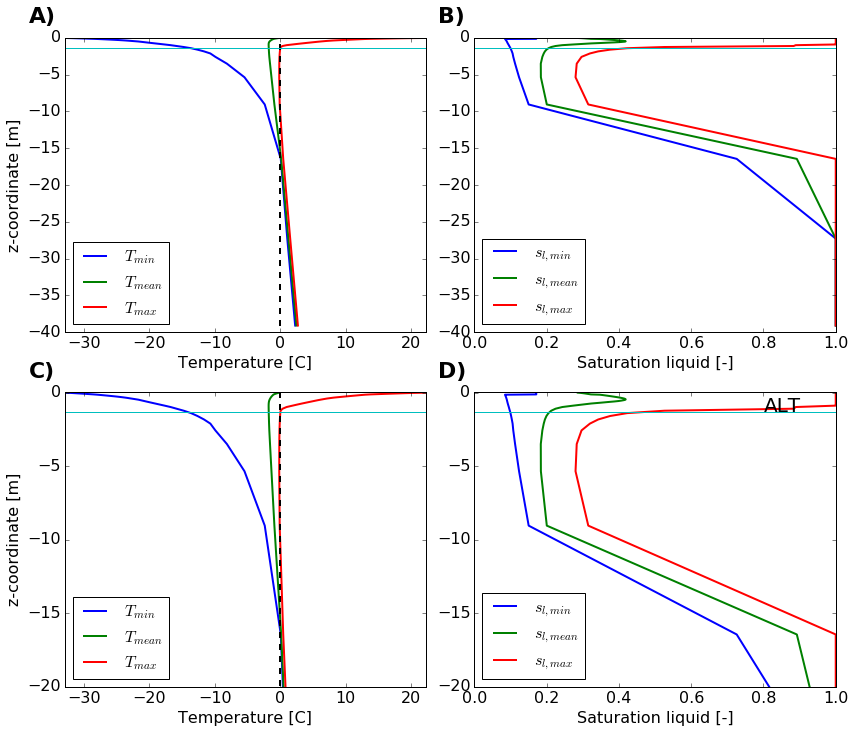

In [4]:
plot_tests("spinup_flux/spin.regression")

[] 0
min,max 21.5691524255 -23.5169662424
T surf amplitude: 22.5430593339
Mean Annual Surf Temp.: 1.52913637885
[] 0
min,max 21.5691524255 -23.5169662424
[] 0
min,max 21.5691524255 -23.5169662424
T surf amplitude: 22.5430593339
Mean Annual Surf Temp.: 1.52913637885
[] 0
min,max 21.5691524255 -23.5169662424


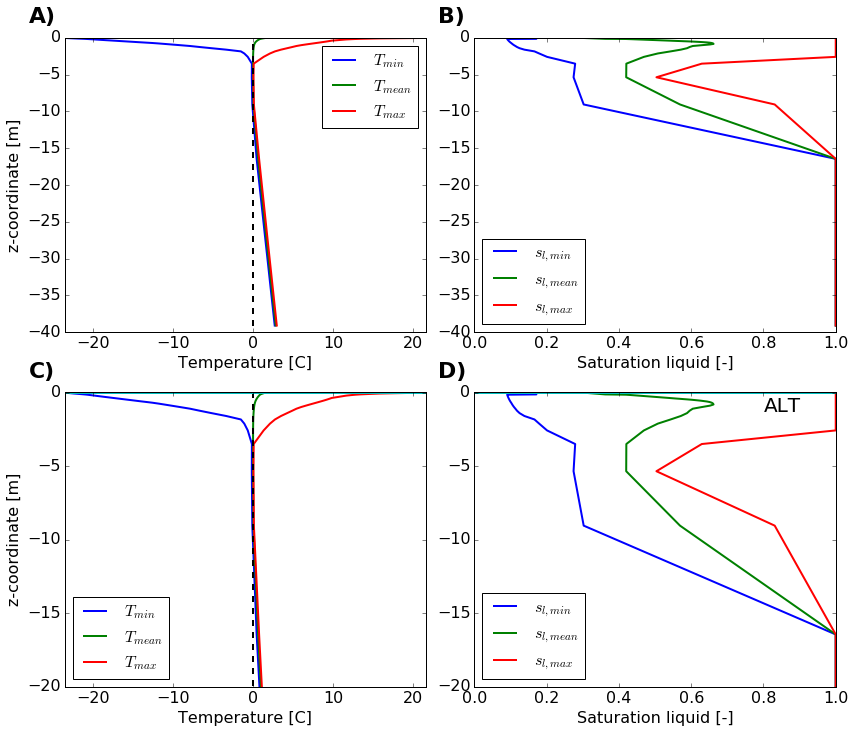

In [5]:
plot_tests("spinup_flux_2xsnow/spin.regression")

[ 2 10] 2
[ 2 10] -1.40077104931 273.144267795 alt: -1.31904012853
min,max 22.2617230671 -32.9517556127
T surf amplitude: 27.6067393399
Mean Annual Surf Temp.: 0.442817681679
[ 2 10] 2
[ 2 10] -1.40077104931 273.144267795 alt: -1.31904012853
min,max 22.2617230671 -32.9517556127
[ 2 10] 2
[ 2 10] -1.40077104931 273.144267795 alt: -1.31904012853
min,max 22.2617230671 -32.9517556127
T surf amplitude: 27.6067393399
Mean Annual Surf Temp.: 0.442817681679
[ 2 10] 2
[ 2 10] -1.40077104931 273.144267795 alt: -1.31904012853
min,max 22.2617230671 -32.9517556127


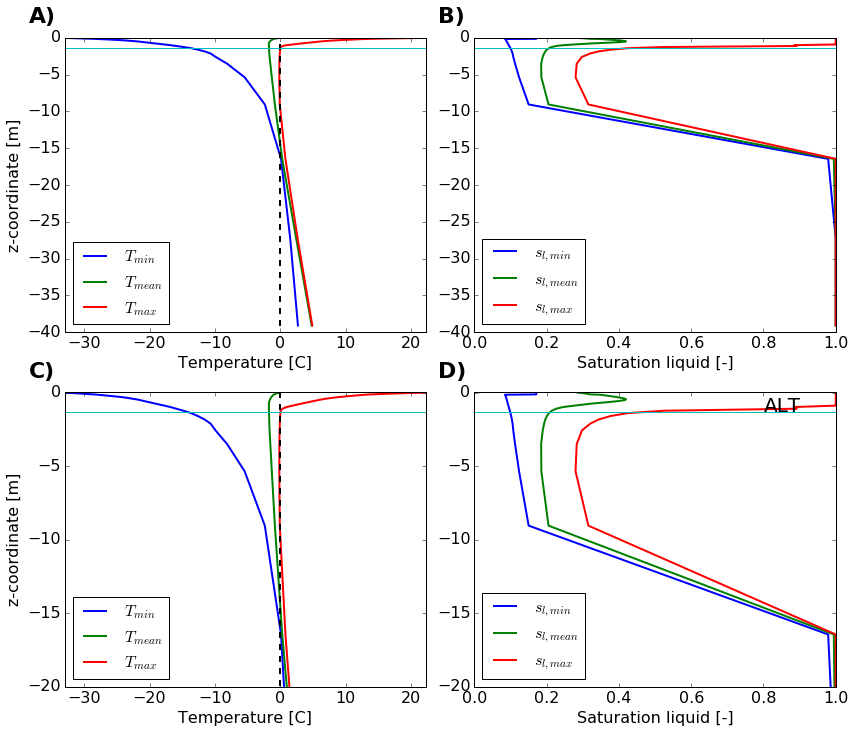

In [20]:
plot_tests("spinup_6c/spin.regression")

In [9]:
plt.savefig('spin_6c.pdf', bbox_inches='tight')

[ 2 10] 2
[ 2 10] -1.40077104931 273.142769416 alt: -1.31904012853
min,max 22.2466587427 -32.8871832387
T surf amplitude: 27.5669209907
Mean Annual Surf Temp.: 0.442617279612
[ 2 10] 2
[ 2 10] -1.40077104931 273.142769416 alt: -1.31904012853
min,max 22.2466587427 -32.8871832387
[ 2 10] 2
[ 2 10] -1.40077104931 273.142769416 alt: -1.31904012853
min,max 22.2466587427 -32.8871832387
T surf amplitude: 27.5669209907
Mean Annual Surf Temp.: 0.442617279612
[ 2 10] 2
[ 2 10] -1.40077104931 273.142769416 alt: -1.31904012853
min,max 22.2466587427 -32.8871832387


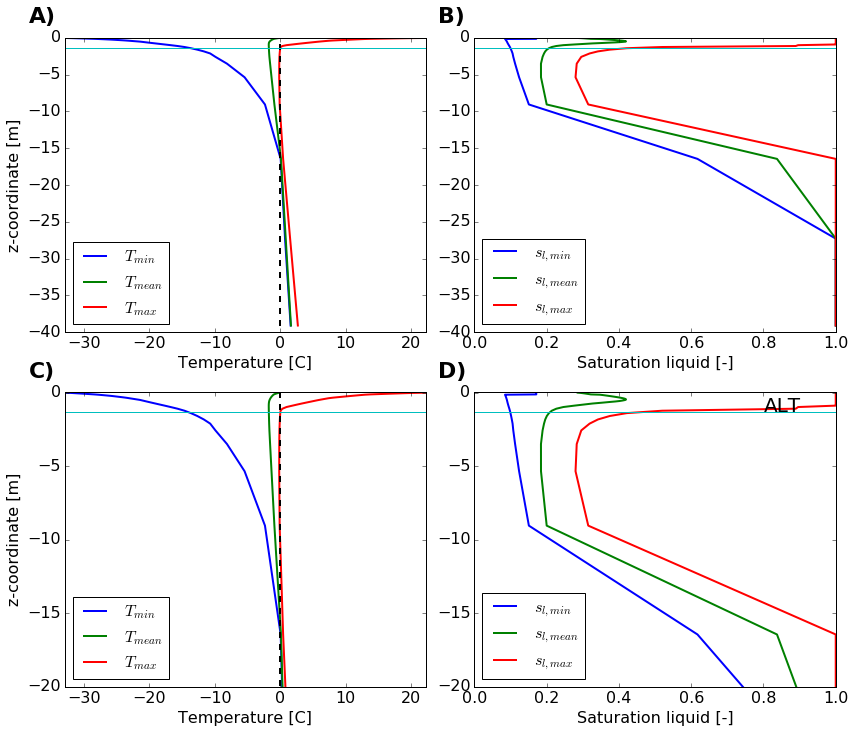

In [21]:
plot_tests("spinup_2c/spin.regression")

[] 0
min,max 21.5691524255 -23.5169662424
T surf amplitude: 22.5430593339
Mean Annual Surf Temp.: 1.52913637885
[] 0
min,max 21.5691524255 -23.5169662424
[] 0
min,max 21.5691524255 -23.5169662424
T surf amplitude: 22.5430593339
Mean Annual Surf Temp.: 1.52913637885
[] 0
min,max 21.5691524255 -23.5169662424


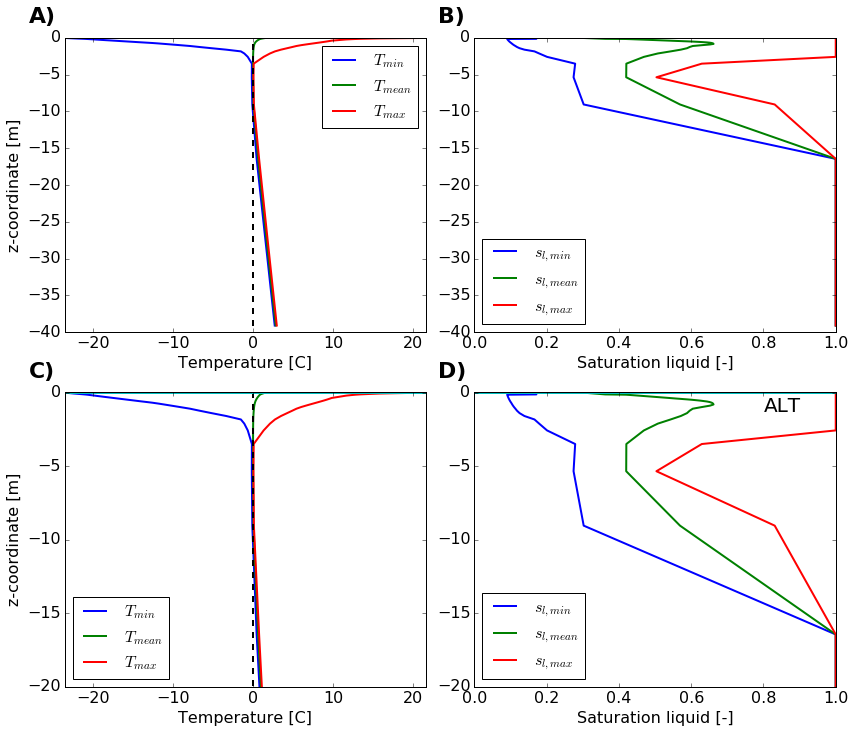

In [29]:
plot_tests("spinup_flux_2xsnow/spin.regression")

[] 0
min,max 21.624083737 -22.7135156256
T surf amplitude: 22.1687996813
Mean Annual Surf Temp.: 1.83553252412
[] 0
min,max 21.624083737 -22.7135156256
[] 0
min,max 21.624083737 -22.7135156256
T surf amplitude: 22.1687996813
Mean Annual Surf Temp.: 1.83553252412
[] 0
min,max 21.624083737 -22.7135156256


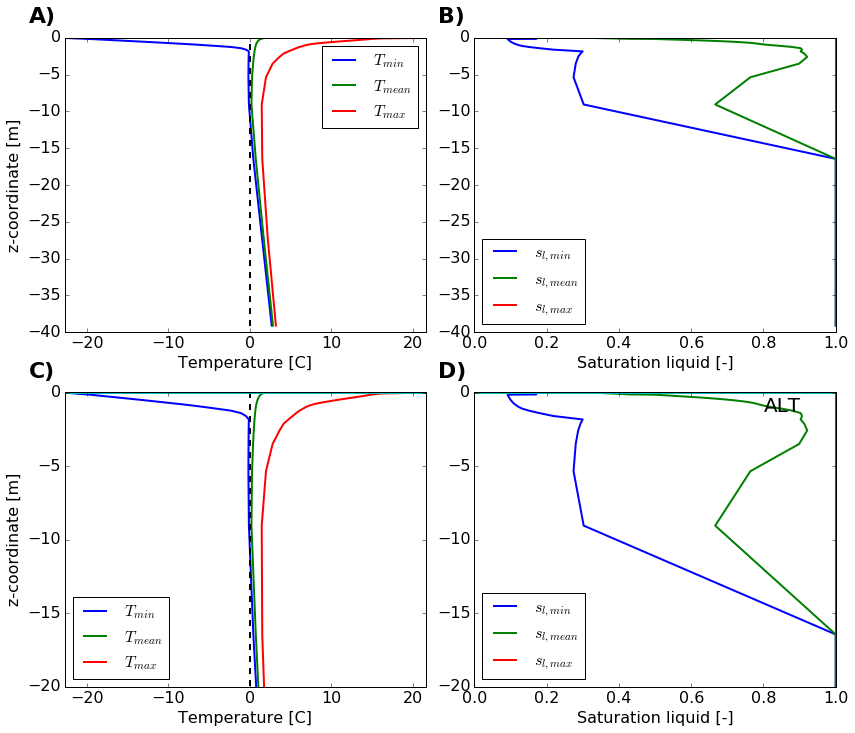

In [30]:
plot_tests("spinup_flux_3xsnow/spin.regression")

plot_tests("test8_1/test8.regression")

[ 2 10] 2
[ 2 10] -1.40077104931 273.123135757 alt: -1.31904012853
min,max 22.2463828607 -32.7655926838
T surf amplitude: 27.5059877723
Mean Annual Surf Temp.: -1.21515389034
[ 2 10] 2
[ 2 10] -1.40077104931 273.123135757 alt: -1.31904012853
min,max 22.2463828607 -32.7655926838
[ 2 10] 2
[ 2 10] -1.40077104931 273.123135757 alt: -1.31904012853
min,max 22.2463828607 -32.7655926838
T surf amplitude: 27.5059877723
Mean Annual Surf Temp.: -1.21515389034
[ 2 10] 2
[ 2 10] -1.40077104931 273.123135757 alt: -1.31904012853
min,max 22.2463828607 -32.7655926838


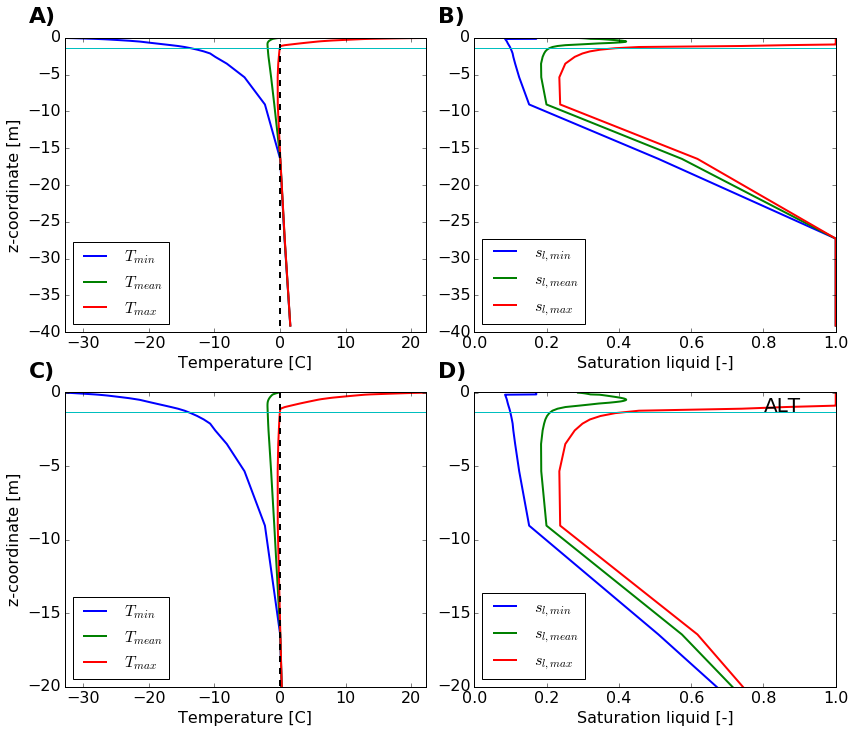

In [25]:
plot_tests("spinup_2c/next.regression")

[ 2 10] 2
[ 2 10] -1.40077104931 273.123462989 alt: -1.31904012853
min,max 22.2353798114 -32.8043269154
T surf amplitude: 27.5198533634
Mean Annual Surf Temp.: -1.16392801543
[ 2 10] 2
[ 2 10] -1.40077104931 273.123462989 alt: -1.31904012853
min,max 22.2353798114 -32.8043269154
[ 2 10] 2
[ 2 10] -1.40077104931 273.123462989 alt: -1.31904012853
min,max 22.2353798114 -32.8043269154
T surf amplitude: 27.5198533634
Mean Annual Surf Temp.: -1.16392801543
[ 2 10] 2
[ 2 10] -1.40077104931 273.123462989 alt: -1.31904012853
min,max 22.2353798114 -32.8043269154


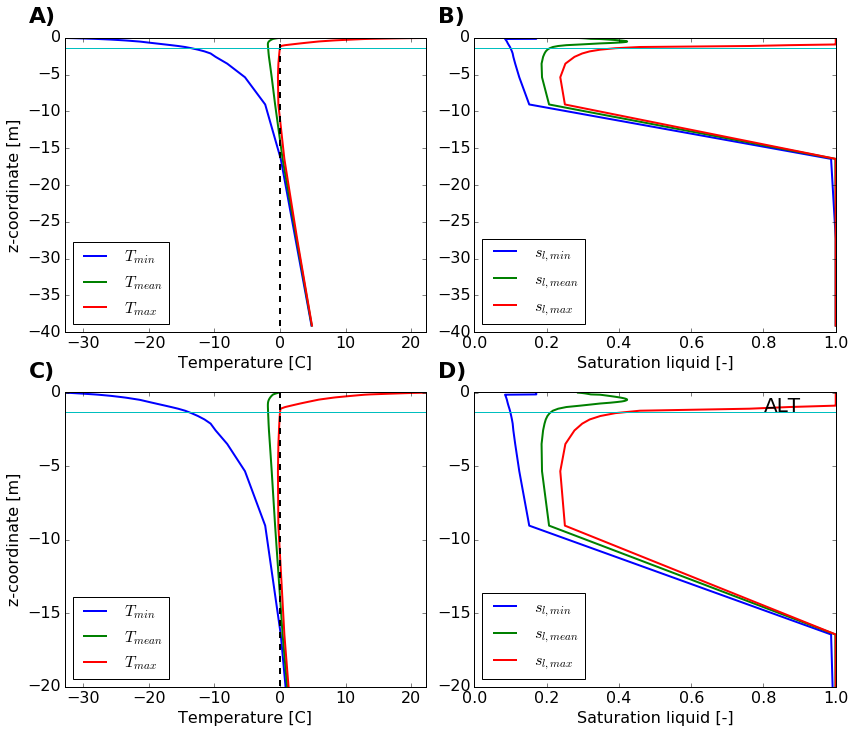

In [26]:
plot_tests("spinup_6c/next.regression")

depth: -39.0933873354 pres: 513101.541312
depth: -0.01 pres: 136881.824224
# of times: 10634
5 1


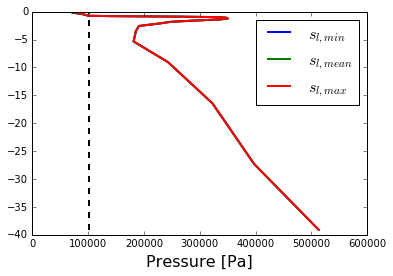

In [41]:
#pressures("/Users/elchin/Projects/amanzi_ats/testing/ats-testsuite-arctic/testing/1Dbotflux/spinup/spin.regression")
pressures("spinup_2c/next.regression")
#pressures("test7_1/test7-organic.regression.gold")

depth: -39.0933873354 pres: 487952.334274
depth: -0.01 pres: 7095.58064887
# of times: 121
4 5


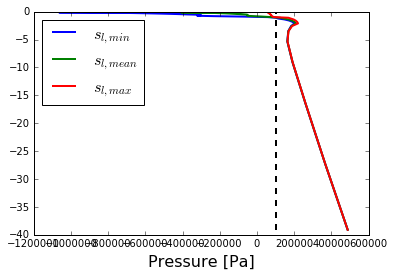

In [33]:
pressures("test7_2/test7/test7-organic.regression.gold")

[12] 1
min,max 10.508646711 -7.00469587165
T surf amplitude: 8.75667129133
Mean Annual Surf Temp.: 0.742731882734
[12] 1
min,max 10.508646711 -7.00469587165
[12] 1
min,max 10.508646711 -7.00469587165
T surf amplitude: 8.75667129133
Mean Annual Surf Temp.: 0.742731882734
[12] 1
min,max 10.508646711 -7.00469587165


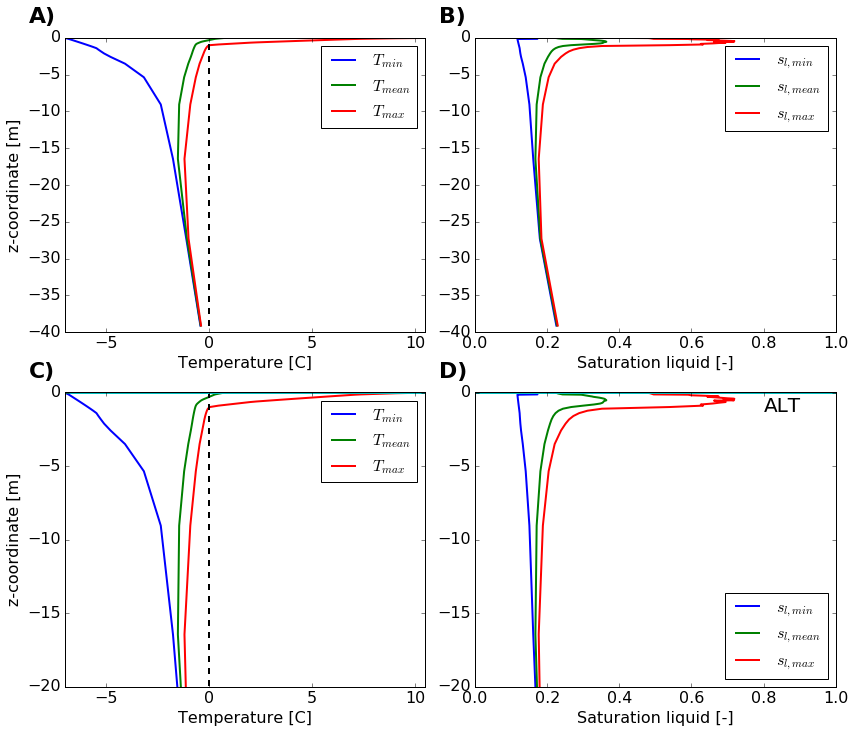

In [40]:
plot_tests("test7_2/test7/test7-organic.regression.gold")

[ 2 10] 2
[ 2 10] -1.40077104931 273.144763845 alt: -1.31904012853
min,max 21.494195933 -24.8900823745
T surf amplitude: 23.1921391537
Mean Annual Surf Temp.: -0.167817843113
[ 2 10] 2
[ 2 10] -1.40077104931 273.144763845 alt: -1.31904012853
min,max 21.494195933 -24.8900823745
[ 2 10] 2
[ 2 10] -1.40077104931 273.144763845 alt: -1.31904012853
min,max 21.494195933 -24.8900823745
T surf amplitude: 23.1921391537
Mean Annual Surf Temp.: -0.167817843113
[ 2 10] 2
[ 2 10] -1.40077104931 273.144763845 alt: -1.31904012853
min,max 21.494195933 -24.8900823745


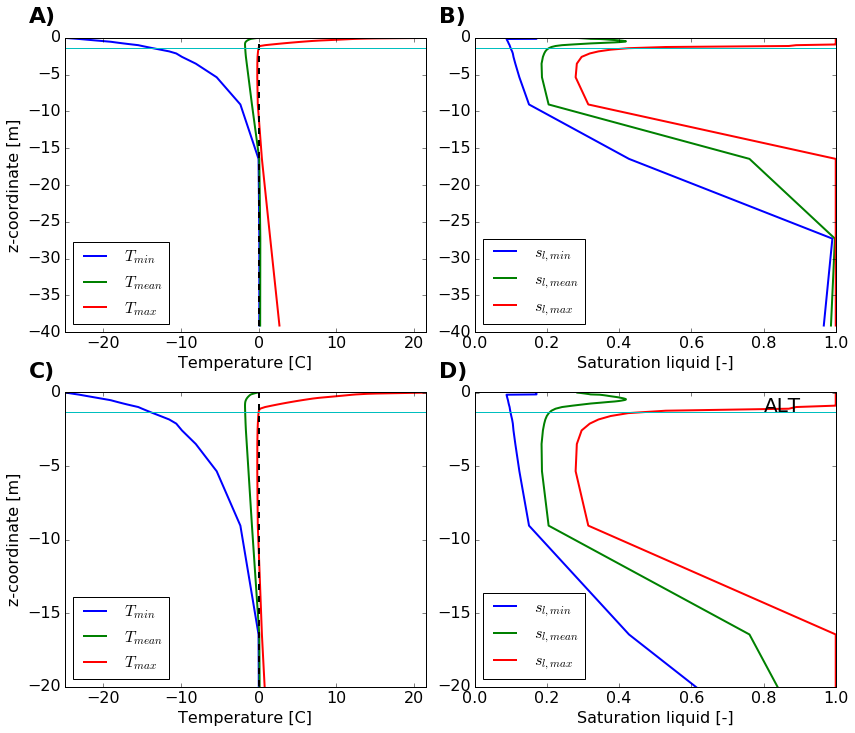

In [5]:
plot_tests("spinup_0C/spin.regression")

[11] 1
min,max 21.4908563414 -24.9393234441
T surf amplitude: 23.2150898927
Mean Annual Surf Temp.: -0.257273634039
[11] 1
min,max 21.4908563414 -24.9393234441
[11] 1
min,max 21.4908563414 -24.9393234441
T surf amplitude: 23.2150898927
Mean Annual Surf Temp.: -0.257273634039
[11] 1
min,max 21.4908563414 -24.9393234441


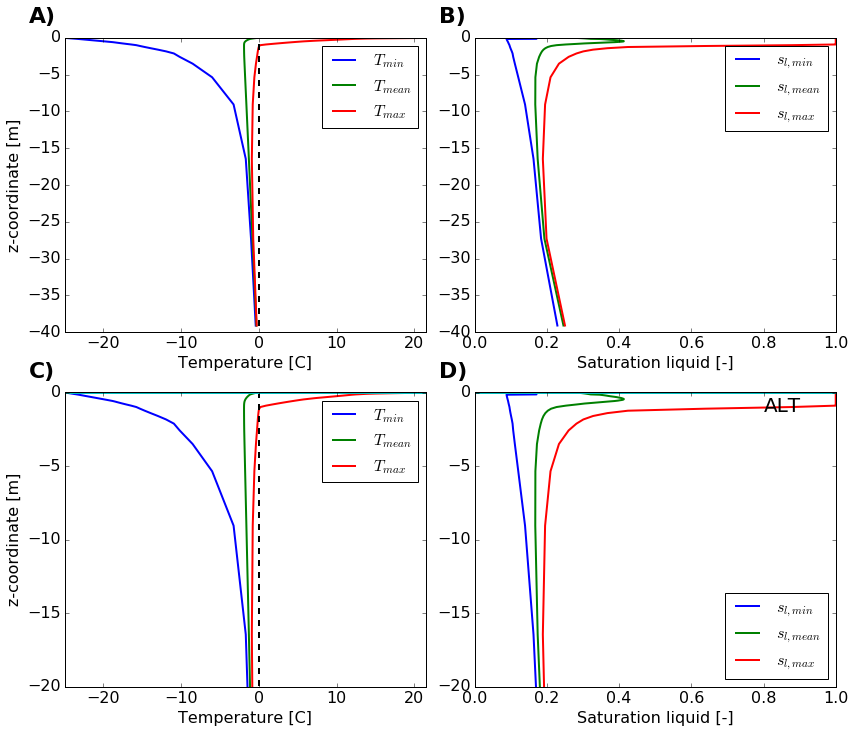

In [6]:
plot_tests("spinup_0C_1/correct_init.regression")

depth: -39.0933873354 pres: 481342.574371
depth: -0.01 pres: 277357.995608
# of times: 1429
11 4


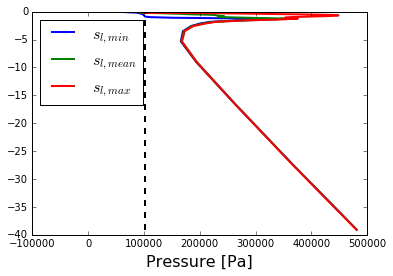

In [7]:
pressures("spinup_0C_1/correct_init.regression")